In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

print('Imported all necessary libraries')

Imported all necessary libraries


In [3]:
# columns = ['id', 'cycle', 'op 1', 'op 2', 'op 3', 'Sensor 1', 'Sensor 2', 
#            'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8', 'Sensor 9', 'Sensor 10', 'Sensor 11', 'Sensor 12', 
#            'Sensor 13', 'Sensor 14', 'Sensor 15', 'Sensor 16', 'Sensor 17', 'Sensor 18', 'Sensor 19', 'Sensor 20', 'Sensor 22', 
#            'Sensor 23']  
columns=["ID","Cycle","OpSet1","OpSet2","OpSet3","Sensor1","Sensor2","Sensor3","Sensor4","Sensor5","Sensor6","Sensor7","Sensor8",
         "Sensor9","Sensor10","Sensor11","Sensor12","Sensor13","Sensor14","Sensor15","Sensor16","Sensor17","Sensor18","Sensor19"
         ,"Sensor20","Sensor21", 'Sensor22', 'Sensor23']

In [4]:
df_train = pd.read_csv('train_FD001.txt', sep=" ", names = columns)

here since we have used text file for creating dataframe, we need to use sep indicate how the columns are separated, what are the names that the columns needs to be given.

In [5]:
df_train.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,Sensor22,Sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [6]:
df_train.shape

(20631, 28)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        20631 non-null  int64  
 1   Cycle     20631 non-null  int64  
 2   OpSet1    20631 non-null  float64
 3   OpSet2    20631 non-null  float64
 4   OpSet3    20631 non-null  float64
 5   Sensor1   20631 non-null  float64
 6   Sensor2   20631 non-null  float64
 7   Sensor3   20631 non-null  float64
 8   Sensor4   20631 non-null  float64
 9   Sensor5   20631 non-null  float64
 10  Sensor6   20631 non-null  float64
 11  Sensor7   20631 non-null  float64
 12  Sensor8   20631 non-null  float64
 13  Sensor9   20631 non-null  float64
 14  Sensor10  20631 non-null  float64
 15  Sensor11  20631 non-null  float64
 16  Sensor12  20631 non-null  float64
 17  Sensor13  20631 non-null  float64
 18  Sensor14  20631 non-null  float64
 19  Sensor15  20631 non-null  float64
 20  Sensor16  20631 non-null  fl

In [8]:
df_train['ID'].nunique()

100

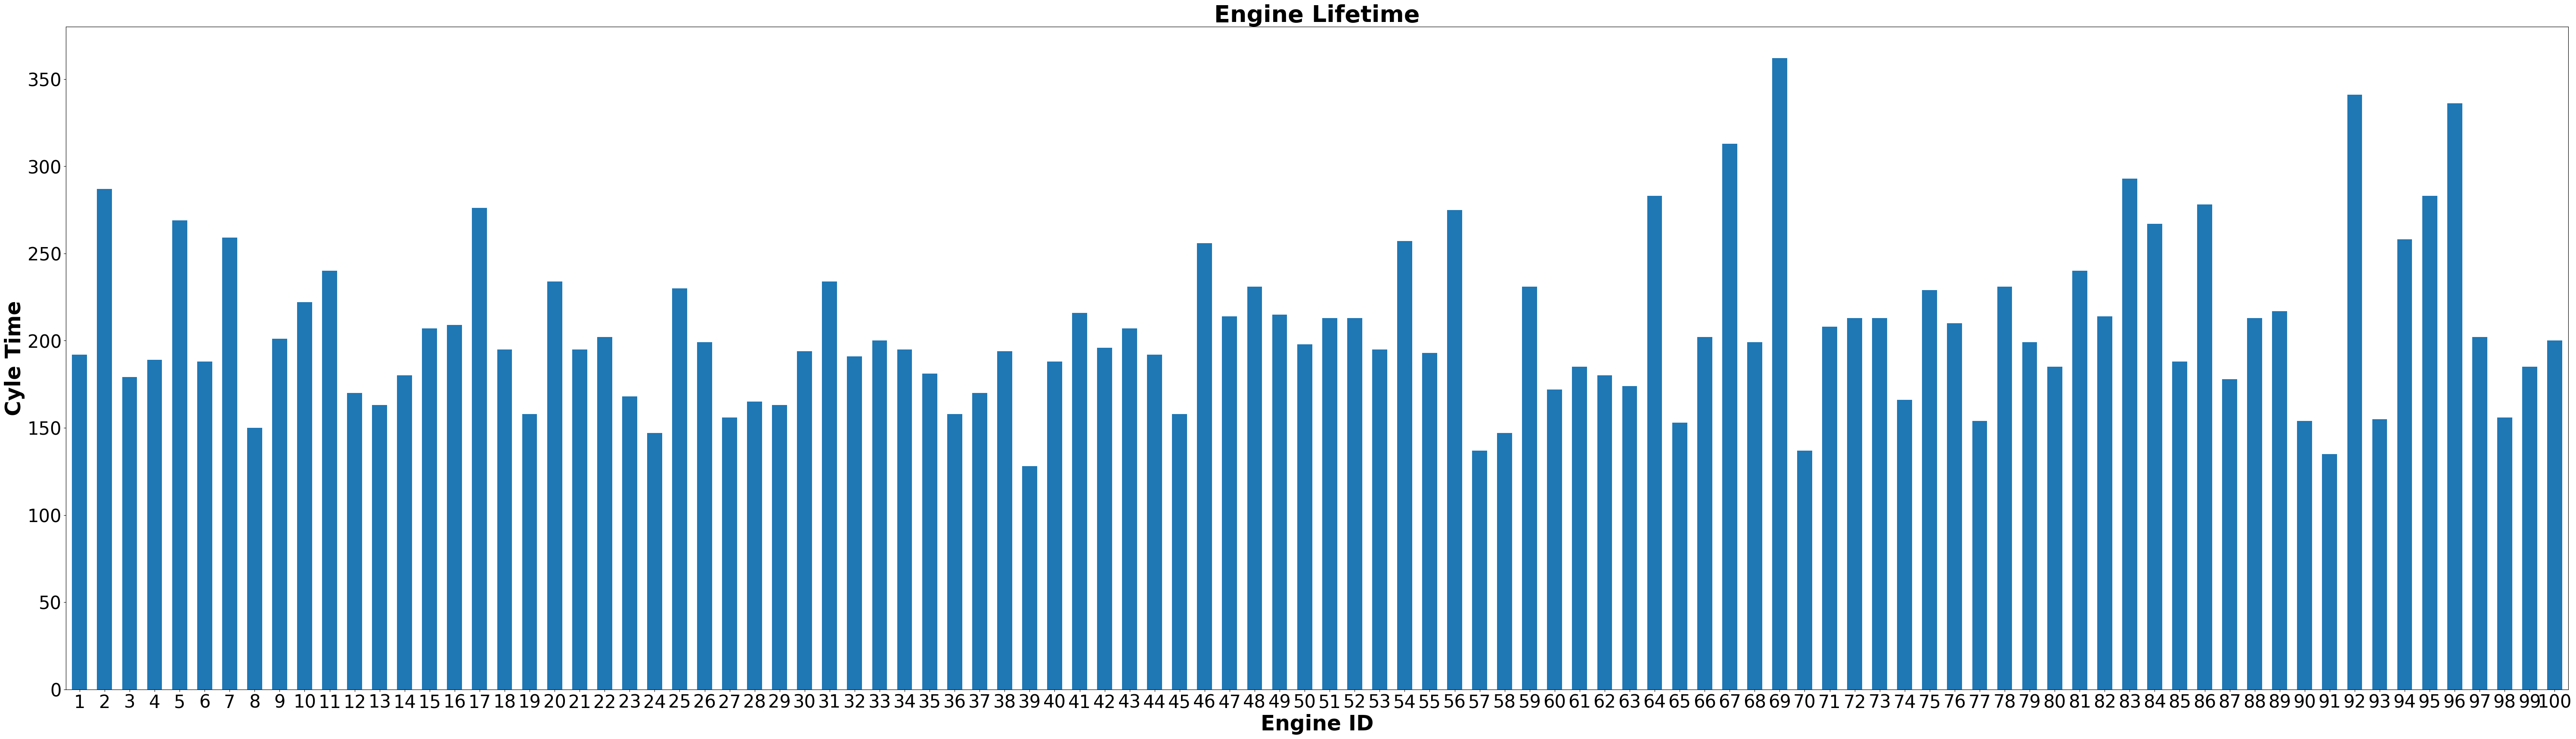

In [9]:
plt.figure(figsize=(75, 20))    #here you are telling that this is the figure size (10*10)
ax=df_train.groupby('ID')['Cycle'].max().plot(kind='bar',width=0.6, stacked=True,rot=0)      
#here we are grouping the each unique id with their maximum cycle time.   
# ax=df_train.groupby('id')['cycle'].max().plot(kind='barh',width=0.8, stacked=True,align='center',rot=0)
plt.title("Engine Lifetime", size=39, fontweight='bold')
plt.xlabel('Engine ID', size=35, fontweight='bold')
plt.ylabel('Cyle Time', fontweight = 'bold', size=35)
plt.xticks(size=30)
plt.yticks(size=30)
plt.grid(False)
# plt.tight_layout(True)
plt.show()

In [10]:
print(df_train.groupby('ID')['Cycle'].max())
# max_values_per_id = df_train.groupby('id')['cycle'].max()
# for id_val, max_cycle in max_values_per_id.items():
#     print(f"ID: {id_val}, Max Cycle: {max_cycle}")

ID
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: Cycle, Length: 100, dtype: int64


In [11]:
df_train_mod = df_train.drop(['Sensor22', 'Sensor23'], axis = 1)
df_train_mod.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [12]:
df_train_mod[df_train_mod['ID'] == 1]

,ID,Cycle,OpSet1,OpSet2,OpSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [13]:
df_train_mod.describe()

,ID,Cycle,OpSet1,OpSet2,OpSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [14]:
df_train_mod.nunique()

ID           100
Cycle        362
OpSet1       158
OpSet2        13
OpSet3         1
Sensor1        1
Sensor2      310
Sensor3     3012
Sensor4     4051
Sensor5        1
Sensor6        2
Sensor7      513
Sensor8       53
Sensor9     6403
Sensor10       1
Sensor11     159
Sensor12     427
Sensor13      56
Sensor14    6078
Sensor15    1918
Sensor16       1
Sensor17      13
Sensor18       1
Sensor19       1
Sensor20     120
Sensor21    4745
dtype: int64

In [15]:
df_train_mod['Sensor12'].value_counts()

Sensor12
521.63    143
521.42    136
521.35    131
521.56    129
521.66    126
         ... 
523.09      1
523.11      1
523.31      1
519.02      1
519.18      1
Name: count, Length: 427, dtype: int64

# Regression Problem

In [16]:
df_train_mod.isnull().sum()
#there is no null values in the dataset :)

ID          0
Cycle       0
OpSet1      0
OpSet2      0
OpSet3      0
Sensor1     0
Sensor2     0
Sensor3     0
Sensor4     0
Sensor5     0
Sensor6     0
Sensor7     0
Sensor8     0
Sensor9     0
Sensor10    0
Sensor11    0
Sensor12    0
Sensor13    0
Sensor14    0
Sensor15    0
Sensor16    0
Sensor17    0
Sensor18    0
Sensor19    0
Sensor20    0
Sensor21    0
dtype: int64

In [17]:
#need to remove columns, that have constant values. 
#Sensor1,Sensor5, Sensor18, Sensor19, Sensor16, Sensor10, Sensor6. 

In [18]:
# df_train_mod = df_train_mod.drop(['Sensor1', 'Sensor5', 'Sensor18', 'Sensor19', 'Sensor16', 'Sensor10', 'Sensor6'],  axis=1)
df_train_mod.shape

(20631, 26)

# Classification Problem
In this project, we ll try to simplify that by converting it to a Classification Problem. Where, the classes/labels will of 3 types, i.e. **Good Condition, Moderate Condition and Warning Condition**.

<h4>labels corresponding to each conditions</h4>

- Good Condition -     0
- Moderate Condition - 1
- Warning Condition -  2

<h2>Defining the labels</h2>

Here we will define the engine's condition with **Life Ratio (LR)**, which is the ratio between **Current Cycle** and the **End cycle or called as End of Life(EOL)**. If **LR=0**, that means the component has just started its degradation and **LR=1** means, it is completely degraded.

- if LR <= 0.6 -       Good Condition
- if 0.6 < LR <= 0.8 - Moderate Condition
- if 0.8 < LR -        Warning Condition

In [19]:
#first need to find the End of Life (EOL) value. 
EOL = []
for s_no in df_train_mod['ID']:
    EOL.append(((df_train_mod[df_train_mod['ID'] == s_no]["Cycle"]).values)[-1])

EOL stands for End of Life, this is a integer that tells at which cycle that engine will become failure. 

In [20]:
np.shape(EOL)

(20631,)

In [21]:
df_train_mod['EOL'] = EOL
df_train_mod.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,EOL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192


now we need to find the Life ratio (LR) which is the ratio of Current cycle / End of Life (EOL)

In [22]:
df_train_mod['LR'] = df_train_mod['Cycle'].div(df_train_mod['EOL'])

ID, EOL is dropped from the dataframe. Now, need to label the Life Ratio so that can classify our engine condition. 

In [23]:
df_train_mod = df_train_mod.drop(['EOL'], axis=1)
df_train_mod.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,LR
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0.005208
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.010417
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.015625
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.020833
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.026042


In [24]:
labels = []
for i in range(0, len(df_train_mod)):
    if np.array(df_train_mod['LR'])[i] <= 0.6 : 
        labels.append(0)
    elif np.array(df_train_mod['LR'])[i] <= 0.8:
        labels.append(1)
    else :
        labels.append(2)
   

In [25]:
df_train_mod['Labels'] = labels  #by assigning labels array variable, labels now becomes one of the column in our dataframe.

In [26]:
df_train_new = df_train_mod.drop(['LR'], axis=1)
df_train_new.tail()

,ID,Cycle,OpSet1,OpSet2,OpSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,Labels
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,2
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,2
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,2
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522,2


In [27]:
df_train_new.shape

(20631, 27)

<h2>Making Training Data-set</h2>

Now the classification data-set is all set, with **25** Features and **1** label/class column, containing 3 classes.

It can be saved in a **.csv** file to access it in any other notebook. Similarly all the **4** Training data were converted into this format and saved as **.csv** file.

In [28]:
df_train_new.to_csv('Training_FD001.csv', index=columns)

In [29]:
df_train_new = pd.read_csv('Training_FD001.csv')

In [30]:
df_train_new.drop(['Unnamed: 0'], axis=1)

,ID,Cycle,OpSet1,OpSet2,OpSet3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,Labels
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,2
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,2
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,2


Creating model just by training only one set of training dataset.

In [ ]:
x = df_train_new.drop(['Labels'], axis=1)  #remove sensor 5, 16, 19, 1. 
y = df_train_new['Labels']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
x_train.shape

(16504, 27)

In [34]:
y_test.shape

(4127,)

In [35]:
y_test.unique()

array([1, 2, 0], dtype=int64)

In [36]:
logistic_model = LogisticRegression() 

In [37]:
logistic_model.fit(x_train, y_train)

C:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred_logistic = logistic_model.predict(x_test)

In [39]:
y_pred_logistic

array([1, 2, 0, ..., 0, 1, 0], dtype=int64)

In [40]:
print(accuracy_score(y_test, y_pred_logistic))

0.8529197964623213


In [41]:
svm_model = SVC(kernel = 'linear')

In [240]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [53]:
# y_pred_svm = svm_model.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_svm))

In [42]:
random_model = RandomForestClassifier(n_estimators=350)
random_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=350)

In [43]:
y_pred_random_model = random_model.predict(x_test)

In [44]:
print(accuracy_score(y_test, y_pred_random_model))

0.9118003392294645


0.89435% for 10,
0.900169% for 20, 
0.9038% for 30, 
0.9050% for 40, 
0.9055% for 45, 0.90937% for 125, 0.9103% - 175, 
0.90865 % for n_estimator = 100, 

In [45]:
import lightgbm as lgb

In [46]:
x_train.columns = x_train.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
x_test.columns = x_test.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)

In [48]:
lgb_clss = lgb.LGBMClassifier(learning_rate=0.01,n_estimators=5000,num_leaves=100,objective='multiclass', num_class=3, metrics='multi_logloss',random_state=50,n_jobs=-1)
lgb_clss.fit(x_train, y_train)
lgb_clss.score(x_test, y_test)
preds2 = lgb_clss.predict(x_test)
print('Acc Score: ',accuracy_score(y_test, preds2))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3438
[LightGBM] [Info] Number of data points in the train set: 16504, number of used features: 20
[LightGBM] [Info] Start training from score -0.519487
[LightGBM] [Info] Start training from score -1.603638
[LightGBM] [Info] Start training from score -1.589581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [49]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
stf_kf=StratifiedKFold(n_splits=5)
import xgboost as xgb
xgb_classifier=xgb.XGBClassifier(n_estimators=725,n_jobs=-1)
params={
         'learning_rate': np.arange(0.01, 0.11, 0.025),
         'max_depth': np.arange(1, 10, 1),
         'min_child_weight': np.arange(1, 10, 1), 
         'subsample': np.arange( 0.7, 1, 0.05), 
         'gamma': np.arange(0.5, 1, 0.1), 
         'colsample_bytree': np.arange( 0.1, 1, 0.05), 
         'scale_pos_weight': np.arange( 20, 200, 10)}
rs_cv_classifier=RandomizedSearchCV(xgb_classifier,param_distributions=params,cv=stf_kf,n_jobs=-1)
rs_cv_classifier.fit(x_train,y_train)
y_pred_rscv=rs_cv_classifier.predict(x_test)
print("Best Parameter: \n",rs_cv_classifier.best_params_)
print("XGBClassifier Acc Score: ",accuracy_score(y_pred_rscv,y_test))

C:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:06:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameter: 
 {'subsample': 0.75, 'scale_pos_weight': 60, 'min_child_weight': 6, 'max_depth': 7, 'learning_rate': 0.085, 'gamma': 0.5, 'colsample_bytree': 0.45000000000000007}
XGBClassifier Acc Score:  0.9508117276472013
